# Data visualization tutorial #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Crop Yields Dataset

#### Plot quantitative variables

In [101]:
# Reads data
crops_all = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/key_crop_yields.csv')
# Removes unnecessary rows
crops_us = crops_all[crops_all['Entity'] == 'United States']
crops = crops_us.iloc[:,[2,3,4]]
# Processes dataset
crops = crops.rename(columns={'Wheat (tonnes per hectare)':'Wheat', 'Rice (tonnes per hectare)':'Rice'})
crops.head()

,Year,Wheat,Rice
12270,1961,1.6070,3.8227
12271,1962,1.6809,4.1785
12272,1963,1.6949,4.4449
12273,1964,1.7344,4.5906
12274,1965,1.7853,4.7693


**Description of dataset**: Crop yield in the USA

- Year: Year
- Wheat: Tonnes per hectare of wheat harvested
- Rice: Tonnes per hectare of rice harvested in a given country and year

Which variables are quantitative? What types of plots correspond with quantitative variables?

In [ ]:
### TODO: Fill in the following code cell wherever you see an ellipsis (...)
values = crops[...] # Wheat values
ax = sns.distplot(values, kde=False, rug=False) # play with the kde and rug arguments!

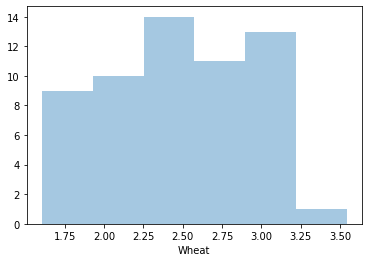

In [91]:
values = crops['Wheat']
ax = sns.distplot(values, kde=False, rug=False)

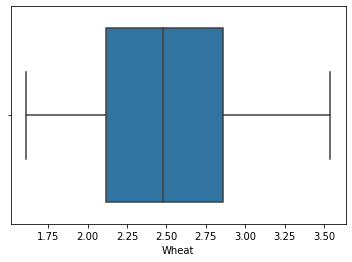

In [85]:
ax = sns.boxplot(x='Wheat', data=crops);

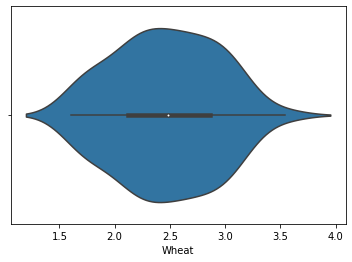

In [116]:
ax = sns.violinplot(x='Wheat', data=crops);

Okay, now let's try something more insightful. Try visualizing the change in the wheat yield over time.

In [ ]:
### TODO
ax = sns.scatterplot(x=..., y=..., data=crops);

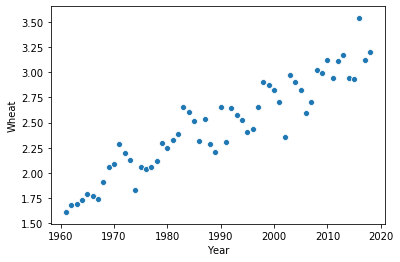

In [86]:
ax = sns.scatterplot(x='Year', y='Wheat', data=crops);

What conclusions can you draw from this scatterplot?

Seems like there's a pretty clear trend. Now let's add a lineplot too.

In [ ]:
### TODO
ax = ... # scatterplot
ax = sns.lineplot(x=..., y=..., data=crops);

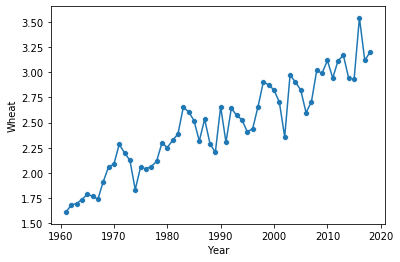

In [87]:
ax = sns.scatterplot(x='Year', y='Wheat', data=crops);
ax = sns.lineplot(x='Year', y='Wheat', data=crops);

Look at that! Our first visualization!

Now let's explore the differences between Wheat and Rice.

**Try-it-yourself!**

Pick a type of plot which would effectively visualize the distribution of rice.

In [ ]:
# TODO: distribution of rice
ax = ... 

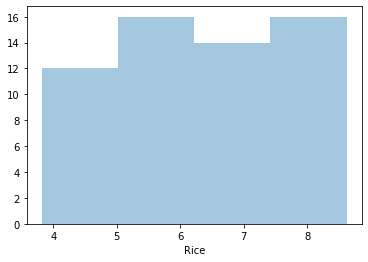

In [92]:
values = crops['Rice']
ax = sns.distplot(values, kde=False, rug=False) # play with the kde and rug arguments!

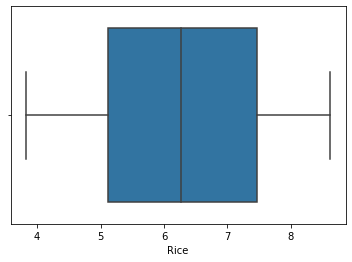

In [117]:
ax = sns.boxplot(x='Rice', data=crops);

In [ ]:
### TODO
ax = ... # scatterplot of Rice
ax = ... # lineplot of Rice

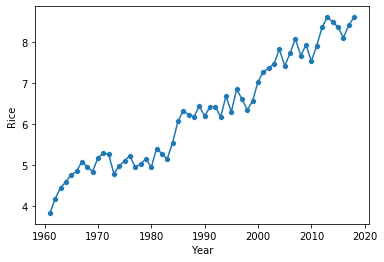

In [93]:
ax = sns.scatterplot(x='Year', y='Rice', data=crops);
ax = sns.lineplot(x='Year', y='Rice', data=crops);

This is useful, but it's annoying to scroll. Let's merge the visualizations together.

In [ ]:
### TODO
sns.scatterplot(x='Year', y=..., data=crops, label='Wheat');
sns.lineplot(x='Year', y='Wheat', data=crops);
... # scatterplot of Rice (don't forget the label)
... # lineplot of Rice

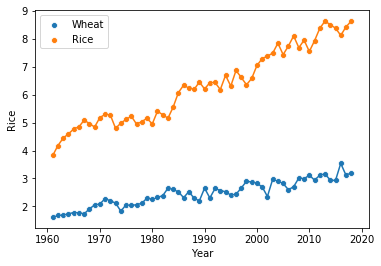

In [94]:
sns.scatterplot(x='Year', y='Wheat', data=crops, label='Wheat');
sns.lineplot(x='Year', y='Wheat', data=crops);
sns.scatterplot(x='Year', y='Rice', data=crops, label='Rice');
sns.lineplot(x='Year', y='Rice', data=crops);

It looks like for Wheat and Rice grow together. Let's look at their scatterplot for more information.

In [ ]:
### TODO
ax = ...

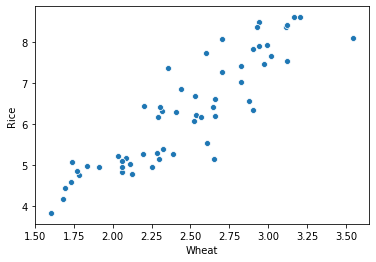

In [96]:
ax = sns.scatterplot(x='Wheat', y='Rice', data=crops);

We can also see the scatterplot with the individual histogram distributions -- like one of the hybrid plots

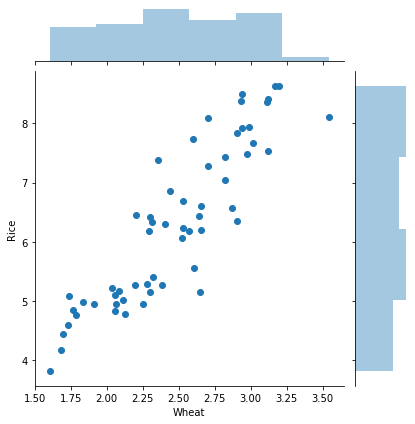

In [114]:
ax = sns.jointplot(x='Wheat', y='Rice', data=crops)

There definitely appears to be some kind of positive correlation between the 2 variables.

Let's try one more type of plot before exploring a more qualitative dataset. We'll look exclusively at Wheat and Rice data in 2000 but across all countries instead.

In [107]:
crops_2000 = crops_all[crops_all['Year']==2000]
crops_2000 = crops_2000.iloc[:,[0,2,3,4]].dropna()
crops_2000 = crops_2000.rename(columns={'Entity':'Country','Wheat (tonnes per hectare)':'Wheat', 'Rice (tonnes per hectare)':'Rice'})
crops_2000.head()

,Country,Year,Wheat,Rice
39,Afghanistan,2000,0.7240,2.0000
97,Africa,2000,1.7520,2.3119
213,Algeria,2000,0.9194,1.3101
329,Americas,2000,2.6660,4.1472
387,Angola,2000,1.7025,1.3454


In [ ]:
### TODO
plt.hist(x=crops_2000[...], alpha=0.5, label=..., color='Orange'); # histogram of Wheat values
... # histogram of Rice values
plt.legend();

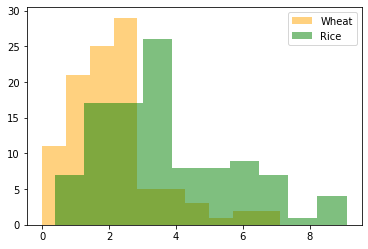

In [108]:
plt.hist(x=crops_2000['Wheat'], alpha=0.5, label='Wheat', color='Orange');
plt.hist(x=crops_2000['Rice'], alpha=0.5, label='Rice', color='Green');
plt.legend();

Great! We see the overlapping histograms of the global crop yield in 2000 of wheat and rice.

### Coffee Ratings Dataset

In [122]:
# Read data in as a pandas dataframe
coffee = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv')
# Removing extra columns
coffee = coffee[['species', 'country_of_origin', 'number_of_bags','harvest_year',
                'acidity', 'balance', 'aroma', 'flavor', 'aftertaste', 'sweetness', 'uniformity', 'color']]
# Pre-processing dataset
coffee = coffee.rename(columns={
    'country_of_origin':'country',
    'number_of_bags':'num bags',
    'harvest_year':'year',
}).dropna()
coffee.head()

,species,country,num bags,year,acidity,balance,aroma,flavor,aftertaste,sweetness,uniformity,color
0,Arabica,Ethiopia,300,2014,8.75,8.42,8.67,8.83,8.67,10.0,10.0,Green
1,Arabica,Ethiopia,300,2014,8.58,8.42,8.75,8.67,8.50,10.0,10.0,Green
3,Arabica,Ethiopia,320,2014,8.42,8.25,8.17,8.58,8.42,10.0,10.0,Green
4,Arabica,Ethiopia,300,2014,8.50,8.33,8.25,8.50,8.25,10.0,10.0,Green
5,Arabica,Brazil,100,2013,8.50,8.33,8.58,8.42,8.42,10.0,10.0,Bluish-Green


**Description of dataset**: Coffee ratings collected from the Coffee Quality Institute's review pages in January 2018 by Buzzfeed data scientist James LeDoux

- species: Species of coffee bean (arabica or robusta)
- country: Where the bean came from
- num bags: Number of bags tested
- year: When the beans were harvested (year)
- color: Color of bean

And the remaining columns represent the 'grades' of the coffee in each attribute (acidity, balance, aroma, flavor, aftertaste, sweetness, uniformity)

#### Plot qualitative variables

Let's make a bar graph to see the top 5 countries where the coffee in our dataset originates from.

In [136]:
top_countries = coffee['country'].value_counts().sort_values(ascending=False)
top_countries[:5]

Mexico       204
Guatemala    169
Colombia     134
Brazil       117
Taiwan        69
Name: country, dtype: int64

In [ ]:
### TODO
__________[:5].plot.bar();

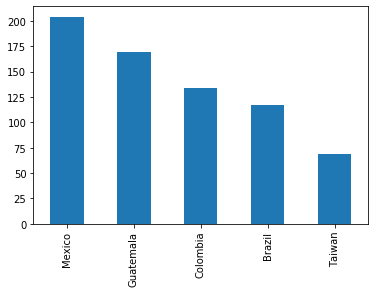

In [140]:
top_countries[:5].plot.bar();

Create one more bar graph to show the counts of each type of bean species in our dataset.

In [ ]:
ax = sns.countplot('species', data=...) ### TODO: bar graph of bean species

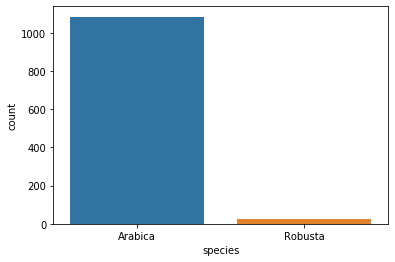

In [126]:
ax = sns.countplot('species', data=coffee);

In [123]:
bean_species = coffee['species'].value_counts().sort_values()
bean_species

Robusta      26
Arabica    1084
Name: species, dtype: int64

Clearly, our graph matches up with what the data tells us in this tabular form. Robusta type coffee must be pretty rare!

### Plot relationships ###

Let's look at the distributions of acidity for each bean color.

In [ ]:
ax = coffee.boxplot(column=..., by='color'); # TODO: plot acidity distributions for each bean color
plt.ylabel('acidity distribution'); # TODO: add label

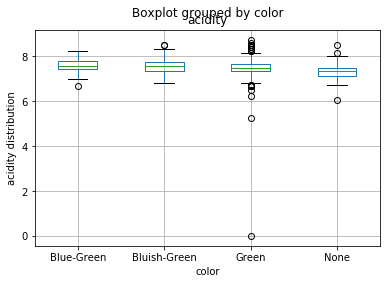

In [148]:
ax = coffee.boxplot(column='acidity', by='color');
plt.ylabel('acidity distribution');

**Try-it-yourself!**

Plot a boxplot for each color genre for a coffee grade of your choice!

Try adding labels :)

In [ ]:
ax = ... # TODO: boxplot by color for coffee grade metric
plt.ylabel(...);

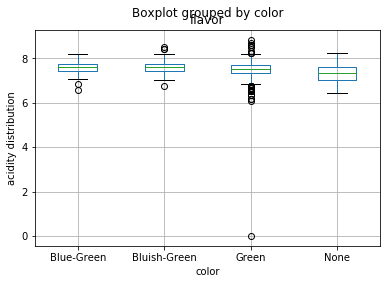

In [153]:
ax = coffee.boxplot(column='flavor', by='color');
plt.ylabel('acidity distribution');

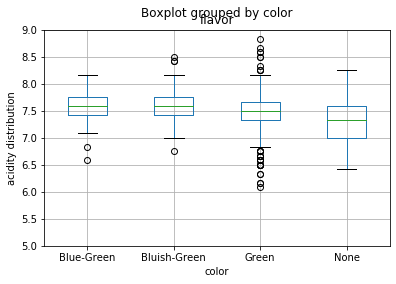

In [155]:
ax = coffee.boxplot(column='flavor', by='color');
plt.ylabel('acidity distribution');
plt.ylim(5,9);

### Adding labels, titles, legends ###

In [156]:
top_countries[:5] # recall the top_countries variable

Mexico       204
Guatemala    169
Colombia     134
Brazil       117
Taiwan        69
Name: country, dtype: int64

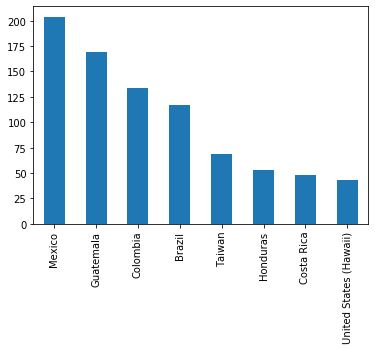

In [157]:
### TODO: add axis labels and a title
ax = ... # bar plot of top 8 countries
ax.set_xlabel(...);
ax.set_ylabel('counts');
ax.set_title(...);

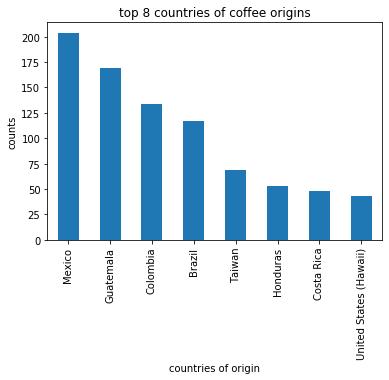

In [168]:
ax = top_countries[:8].plot.bar()
ax.set_title('top 8 countries of coffee origins');
ax.set_ylabel('counts');
ax.set_xlabel('countries of origin');

In [ ]:
### TODO: play with font size, rotate x-axis labels
ax = ____________________________.bar(rot=45)
ax.set_title(..., fontsize=20);
ax.set_ylabel(..., fontsize=16);
ax.set_xlabel(..., fontsize=16);

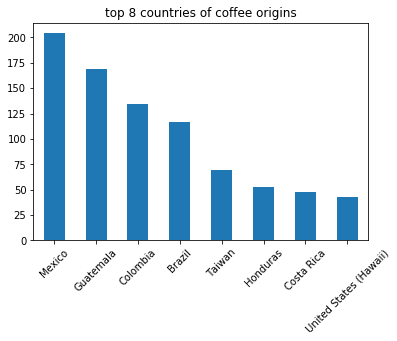

In [167]:
ax = top_countries[:8].plot.bar(rot=45)
ax.set_title('top 8 countries of coffee origins', fontsize=20);
ax.set_ylabel('counts', fontsize=16);
ax.set_xlabel('countries of origin', fontsize=16);

Let's try grouping different countries' coffee grades together in a new dataset so we can see how they compare to each other.

In [190]:
coffee_grades = coffee.groupby('country').mean()
coffee_grades.head()

,num bags,acidity,balance,aroma,flavor,aftertaste,sweetness,uniformity
country,,,,,,,,
Brazil,232.752137,7.504359,7.521368,7.533761,7.565299,7.431026,9.948632,9.880171
Burundi,300.000000,7.330000,7.080000,7.080000,7.250000,7.170000,10.000000,10.000000
China,3.437500,7.578125,7.548125,7.641250,7.625625,7.484375,9.916250,9.958125
Colombia,224.358209,7.592015,7.718060,7.659776,7.620149,7.558657,9.965224,9.920373
Costa Rica,204.229167,7.578542,7.637083,7.683958,7.542917,7.538333,9.902708,9.847292


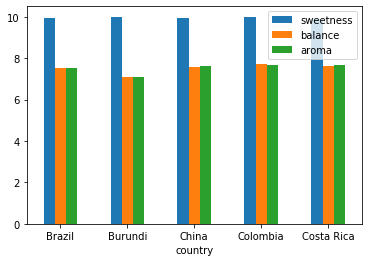

In [193]:
axes = coffee_grades[['sweetness', 'balance','aroma']].head().plot.bar(rot=0, subplots=False)

**Try-it-yourself!**

Pick a type of plot which would effectively visualize different coffee grades for different countries. Don't forget your labels!

In [ ]:
### TODO
ax = ...

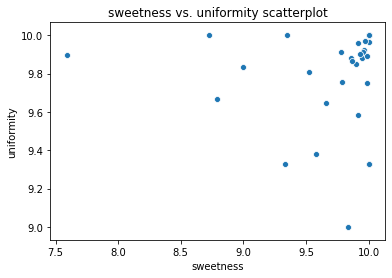

In [192]:
ax = sns.scatterplot(x='sweetness', y='uniformity', data=coffee_grades);
plt.title('sweetness vs. uniformity scatterplot');